In [1]:
# import needed libraries
import sys
import os 
import pickle
from collections import OrderedDict
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path) 

# import local packages and functions 
import rvesimulator 
from rvesimulator.simulators.pnas_composite import PnasRVE
from rvesimulator.design_of_experiment.samplers import FixNumberSampler
from rvesimulator.simulators.path_generator import PathGenerator

In [2]:
# create the doe
# define the design space
doe_variables = OrderedDict({"vol_req": 0.30,"control_points": 7})

# define number of samples
num_points = 1
# define the information of outputs
name_outputs = ["vol_frac", "strain", "stress", "plastic_energy"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=123456,
)
data = doe_sampler.data
print(data)

{'samples':    vol_req  control_points
0      0.3             7.0, 'responses':   vol_frac strain stress plastic_energy
0      NaN    NaN    NaN            NaN}


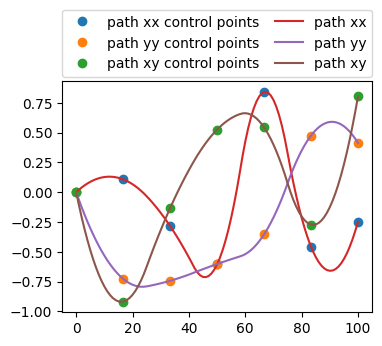

{'samples':    vol_req  control_points                                         loads_path
0      0.3             7.0  [[0.0, 0.02120218783234469, 0.0405251193003018..., 'responses':   vol_frac strain stress plastic_energy
0      NaN    NaN    NaN            NaN}


In [3]:
#
loads_path_temp = np.empty([num_points, 1])
loads_path_temp[:] = np.nan
# print(loads_path_temp)
loads_path = pd.DataFrame(loads_path_temp, columns=["loads_path"])
loads_path["loads_path"] = loads_path["loads_path"].astype(object)
# print(loads_path)

# define the path generator
for ii in range(num_points):
    path_generator = PathGenerator(num_control_points=data["samples"].at[ii, "control_points"],num_increment=100)   
    loads_path.iloc[ii, 0] = path_generator.quadratic_interpolate()
    path_generator.plot_path()

# add the loads path to the samples
data["samples"] = pd.concat(
    [data["samples"], loads_path], axis=1, join="inner"
)
print(data)

# fiber material 1 
- fiber young's modulus
- $E_{fiber}=1 \; \text{MPa}$ 


In [4]:
simulation_wrapper = PnasRVE()
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    E_fiber=1,
                                    print_info=True)

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.6251914510450486, 0.6267914553968891, 0.6283617329355872, 0.6299037123771667, 0.6314187140982368, 

In [5]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('yield_criterion_1.pickle')


Time of generate the 2D RVE with volume fraction            = 0.31  is 0.03 s
micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/pnas_composite/different_fiber_material/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<14 out of 30 licenses remain available>.


the simulation time is :40.00696873664856 !
the simulation time is :60.01904535293579 !
the simulation time is :80.01912546157837 !
the simulation time is :100.01908373832703 !
the simulation time is :120.01952815055847 !
the simulation time is :140.01923513412476 !
the simulation time is :160.01927876472473 !
the simulation time is :180.01625800132751 !
the simulation time is :200.01927661895752 !
the simulation time is :220.0194501876831 !
the simulation time is :240.01935362815857 !
the simulation time is :260.01636934280396 !
the simulation time is :280.0162410736084 !
the simulation time is :300.019474029541 !
the simulation time is :320.01952052116394 !
the simulation time is :340.0140755176544 !
the simulation time is :360.0196633338928 !
the simulation time is :380.0119423866272 !
the simulation time is :400.01974177360535 !
the simulation time is :420.02035427093506 !
the simulation time is :440.0198495388031 !
the simulation time is :460.02109956741333 !
Simulation successful

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


# fiber material 2
- fiber young's modulus
- $E_{fiber}=10  \; \text{MPa}$

In [6]:
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    E_fiber=10,
                                    print_info=True)

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.6251914510450486, 0.6267914553968891, 0.6283617329355872, 0.6299037123771667, 0.6314187140982368, 

In [8]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('yield_criterion_2.pickle')

micro-structure file already exist

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/pnas_composite/different_fiber_material/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


the simulation time is :40.00861620903015 !
the simulation time is :60.01941633224487 !
the simulation time is :80.01988172531128 !
the simulation time is :100.01799297332764 !
the simulation time is :120.01675367355347 !
the simulation time is :140.01728510856628 !
the simulation time is :160.01717805862427 !
the simulation time is :180.01688814163208 !
the simulation time is :200.01689863204956 !
the simulation time is :220.01703357696533 !
the simulation time is :240.0207600593567 !
the simulation time is :260.017126083374 !
the simulation time is :280.02043199539185 !
the simulation time is :300.01741576194763 !
the simulation time is :320.020295381546 !
the simulation time is :340.0174126625061 !
the simulation time is :360.01862382888794 !
the simulation time is :380.0173318386078 !
the simulation time is :400.0173075199127 !
the simulation time is :420.0202121734619 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)


*** ABAQUS

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


# fiber material 3 
- fiber young's modulus
- $E_{fiber}=100  \; \text{MPa}$


In [9]:
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    E_fiber=100,
                                    print_info=True)

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.6251914510450486, 0.6267914553968891, 0.6283617329355872, 0.6299037123771667, 0.6314187140982368, 

In [10]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('yield_criterion_3.pickle')

remove results succesfully 

micro-structure file already exist

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/pnas_composite/different_fiber_material/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


the simulation time is :40.009763956069946 !
the simulation time is :60.01789927482605 !
the simulation time is :80.0202260017395 !
the simulation time is :100.0201485157013 !
the simulation time is :120.01798248291016 !
the simulation time is :140.01802492141724 !
the simulation time is :160.01913237571716 !
the simulation time is :180.01803708076477 !
the simulation time is :200.020569562912 !
the simulation time is :220.0181815624237 !
the simulation time is :240.018212556839 !
the simulation time is :260.018262386322 !
the simulation time is :280.01832270622253 !
the simulation time is :300.01826882362366 !
the simulation time is :320.01827788352966 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 340.0808296203613
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an e

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


# fiber material 4 
- fiber young's modulus
- $E_{fiber}=1000  \; \text{MPa}$

In [11]:
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    E_fiber=1000,
                                    print_info=True)

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.6251914510450486, 0.6267914553968891, 0.6283617329355872, 0.6299037123771667, 0.6314187140982368, 

In [12]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('yield_criterion_4.pickle')

remove results succesfully 

micro-structure file already exist

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/pnas_composite/different_fiber_material/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


the simulation time is :40.01014828681946 !
the simulation time is :60.016441345214844 !
the simulation time is :80.0197103023529 !
the simulation time is :100.01645088195801 !
the simulation time is :120.00855374336243 !
the simulation time is :140.0205409526825 !
the simulation time is :160.01870608329773 !
the simulation time is :180.01680278778076 !
the simulation time is :200.0166997909546 !
the simulation time is :220.02047276496887 !
the simulation time is :240.01670908927917 !
the simulation time is :260.0030517578125 !
the simulation time is :280.01678442955017 !
the simulation time is :300.0207803249359 !
the simulation time is :320.0187566280365 !
the simulation time is :340.016991853714 !
the simulation time is :360.0169036388397 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 380.0892479419708
##################################################
########### START ABAQUS POST ANALYSIS #######

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<13 out of 30 licenses remain available>.


# plot all results together 

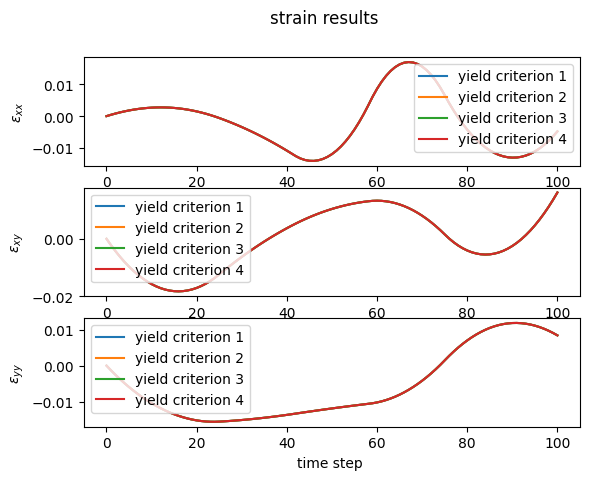

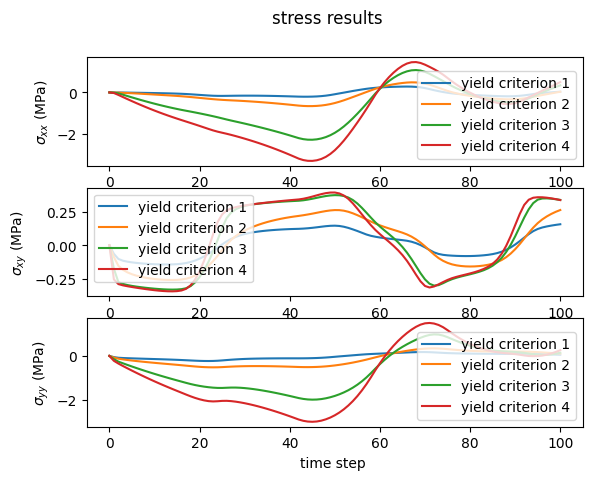

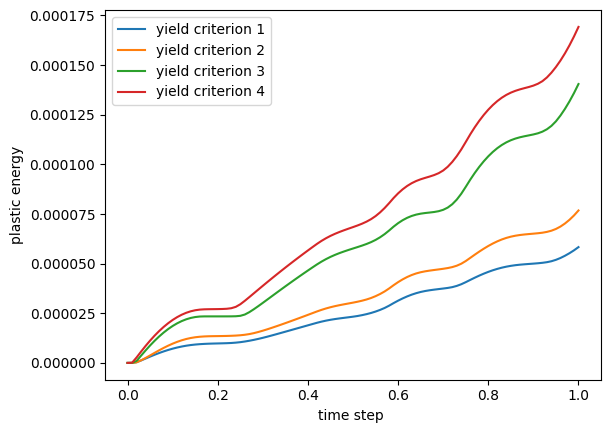

In [13]:
with open("yield_criterion_1.pickle", "rb") as fd:
    yield_criterion_1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("yield_criterion_2.pickle", "rb") as fd:
    yield_criterion_2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("yield_criterion_3.pickle", "rb") as fd:
    yield_criterion_3 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("yield_criterion_4.pickle", "rb") as fd:
    yield_criterion_4 = pickle.load(fd, fix_imports=True, encoding="latin1")

results_1 =yield_criterion_1["responses"]
results_2 =yield_criterion_2["responses"]
results_3 =yield_criterion_3["responses"]
results_4 =yield_criterion_4["responses"]
# result of benchmark1
stress_1 = results_1["stress"].iloc[0]
strain_1 = results_1["strain"].iloc[0]
plastic_energy_1 = results_1["plastic_energy"].iloc[0]
# result of benchmark2
stress_2 = results_2["stress"].iloc[0]
strain_2 = results_2["strain"].iloc[0]
plastic_energy_2 = results_2["plastic_energy"].iloc[0]

# result of benchmark3
stress_3 = results_3["stress"].iloc[0]
strain_3 = results_3["strain"].iloc[0]
plastic_energy_3 = results_3["plastic_energy"].iloc[0]

# result of benchmark4
stress_4 = results_4["stress"].iloc[0]
strain_4 = results_4["strain"].iloc[0]
plastic_energy_4 = results_4["plastic_energy"].iloc[0]


pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xx}$")
fig, ax = plt.subplots(3,1)
ax[0].plot(strain_1[:, 0, 0], label="yield criterion 1") 
ax[0].plot(strain_2[:, 0, 0], label="yield criterion 2") 
ax[0].plot(strain_3[:, 0, 0], label="yield criterion 3") 
ax[0].plot(strain_4[:, 0, 0], label="yield criterion 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xy}$")
ax[1].plot(strain_1[:, 0, 1], label="yield criterion 1")
ax[1].plot(strain_2[:, 0, 1], label="yield criterion 2")
ax[1].plot(strain_3[:, 0, 1], label="yield criterion 3")
ax[1].plot(strain_4[:, 0, 1], label="yield criterion 4")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{yy}$")
ax[2].plot(strain_1[:, 1, 1], label="yield criterion 1") 
ax[2].plot(strain_2[:, 1, 1], label="yield criterion 2") 
ax[2].plot(strain_3[:, 1, 1], label="yield criterion 3") 
ax[2].plot(strain_4[:, 1, 1], label="yield criterion 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('strain results')
plt.savefig('strain.png', dpi=300)

pparam = dict(xlabel='time step ', ylabel="$\sigma_{xx}$ (MPa)")
fig, ax = plt.subplots(3,1)
ax[0].plot(stress_1[:, 0, 0], label="yield criterion 1") 
ax[0].plot(stress_2[:, 0, 0], label="yield criterion 2") 
ax[0].plot(stress_3[:, 0, 0], label="yield criterion 3") 
ax[0].plot(stress_4[:, 0, 0], label="yield criterion 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{xy}$ (MPa)")
ax[1].plot(stress_1[:, 1, 0], label="yield criterion 1")
ax[1].plot(stress_2[:, 1, 0], label="yield criterion 2")
ax[1].plot(stress_3[:, 1, 0], label="yield criterion 3")
ax[1].plot(stress_4[:, 1, 0], label="yield criterion 4")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{yy}$ (MPa)")
ax[2].plot(stress_1[:, 1, 1], label="yield criterion 1") 
ax[2].plot(stress_2[:, 1, 1], label="yield criterion 2") 
ax[2].plot(stress_3[:, 1, 1], label="yield criterion 3") 
ax[2].plot(stress_4[:, 1, 1], label="yield criterion 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('stress results')
# plt.show()
plt.savefig('stress.png', dpi=300)


pparam = dict(xlabel='time step ', ylabel="plastic energy")
fig, ax = plt.subplots()
ax.plot(plastic_energy_1[:,0], plastic_energy_1[:,1], label="yield criterion 1") 
ax.plot(plastic_energy_2[:,0], plastic_energy_2[:,1], label="yield criterion 2") 
ax.plot(plastic_energy_3[:,0], plastic_energy_3[:,1], label="yield criterion 3") 
ax.plot(plastic_energy_4[:,0], plastic_energy_4[:,1], label="yield criterion 4") 
ax.legend()
ax.set(**pparam)
plt.savefig('energy.png', dpi=300)